c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

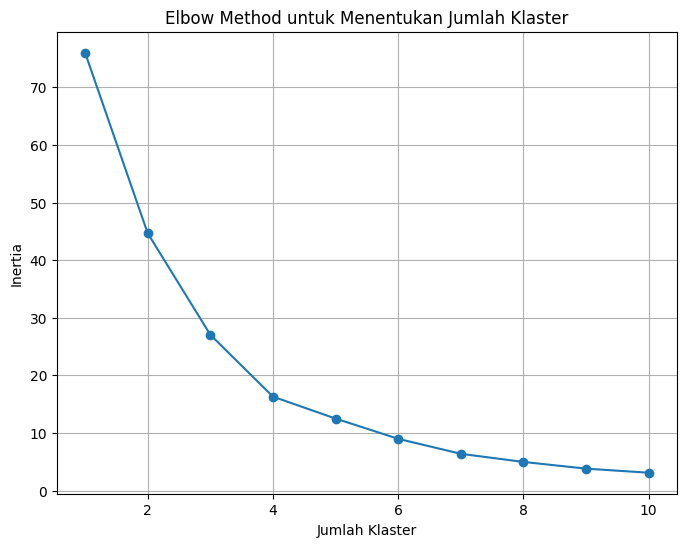

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


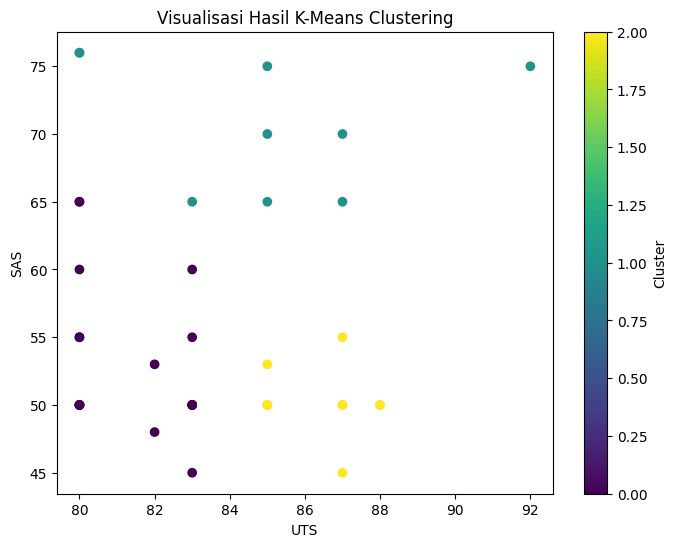

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Langkah 1: Membaca data
df = pd.read_csv('nilai82.csv')  # Pastikan file CSV sudah diupload di direktori yang benar

# Langkah 2: Standarisasi data untuk kolom UTS dan SAS
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['UTS', 'SAS']])

# Langkah 3: Menentukan jumlah klaster yang optimal menggunakan Elbow Method
inertia = []  # Daftar untuk menyimpan inertia untuk berbagai jumlah klaster
for k in range(1, 11):  # Mencoba klaster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Langkah 4: Menjalankan K-Means dengan jumlah klaster yang optimal (misalnya k=3 berdasarkan Elbow Method)
optimal_k = 3  # Ganti dengan jumlah klaster yang sesuai dari hasil Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Langkah 5: Visualisasi hasil klastering
plt.figure(figsize=(8,6))
plt.scatter(df['UTS'], df['SAS'], c=df['Cluster'], cmap='viridis')
plt.title('Visualisasi Hasil K-Means Clustering')
plt.xlabel('UTS')
plt.ylabel('SAS')
plt.colorbar(label='Cluster')
plt.show()
